In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro,kstest,normaltest

import warnings
warnings.filterwarnings("ignore")

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


#### 1) Problem Statement

In [2]:
# To predict charges based on following features
# 'age', 'sex', 'bmi', 'children', 'smoker', 'region'

#### 2) Data Gathering

In [4]:
df = pd.read_csv("medical_insurance.csv")
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### 3) Exploratory Data Analysis (EDA ) OR DQ check

#### - column wise analysis

In [5]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [6]:
df['sex'].unique()

array(['female', 'male', 'Female', 'MALE'], dtype=object)

In [7]:
df['sex'] = df['sex'].str.lower()

In [8]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [10]:
df.bmi.unique()

array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [11]:
df['smoker'].unique()#  'region', 'charges'

array(['yes', 'no'], dtype=object)

In [12]:
df['region'].unique()#  'region', 'charges'

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
df['charges'].unique().tolist()#  'region', 'charges'

[16884.924,
 1725.5523,
 4449.462,
 21984.47061,
 3866.8552,
 3756.6216,
 8240.5896,
 7281.5056,
 6406.4107,
 28923.13692,
 2721.3208,
 27808.7251,
 1826.843,
 11090.7178,
 39611.7577,
 1837.237,
 10797.3362,
 2395.17155,
 10602.385,
 36837.467,
 13228.84695,
 4149.736,
 1137.011,
 37701.8768,
 6203.90175,
 14001.1338,
 14451.83515,
 12268.63225,
 2775.19215,
 38711.0,
 35585.576,
 2198.18985,
 4687.797,
 13770.0979,
 51194.55914,
 1625.43375,
 15612.19335,
 2302.3,
 39774.2763,
 48173.361,
 3046.062,
 4949.7587,
 6272.4772,
 6313.759,
 6079.6715,
 20630.28351,
 3393.35635,
 3556.9223,
 12629.8967,
 38709.176,
 2211.13075,
 3579.8287,
 23568.272,
 37742.5757,
 8059.6791,
 47496.49445,
 13607.36875,
 34303.1672,
 23244.7902,
 5989.52365,
 8606.2174,
 4504.6624,
 30166.61817,
 4133.64165,
 14711.7438,
 1743.214,
 14235.072,
 6389.37785,
 5920.1041,
 17663.1442,
 16577.7795,
 6799.458,
 11741.726,
 11946.6259,
 7726.854,
 11356.6609,
 3947.4131,
 1532.4697,
 2755.02095,
 6571.02435,
 4441

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [16]:
pd.DataFrame({"Missing count": df.isna().sum(),"Missing per": df.isna().mean()})

,Missing count,Missing per
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [17]:
df["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

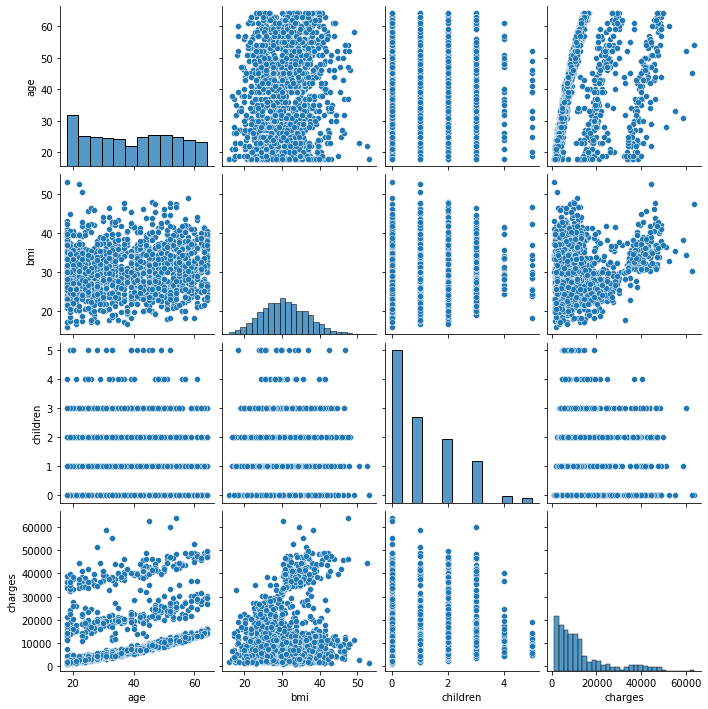

In [18]:
sns.pairplot(df)

<Axes: xlabel='age', ylabel='charges'>

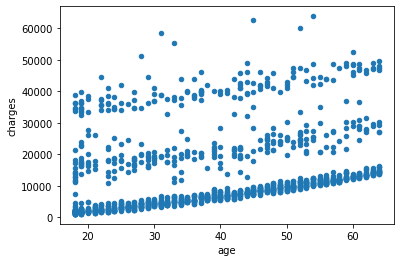

In [41]:
df.plot(x = "age",y="charges",kind = "scatter")

#### 4. Feature Engineering

In [19]:
df1 = df.copy()
df1.drop("sex",axis = 1,inplace=True)

In [20]:
df1.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
# 'smoker', 'region'
df1["smoker"].replace({"yes":1,"no":0},inplace=True)

In [22]:
df1["smoker"].unique()

array([1, 0], dtype=int64)

In [23]:
df1["region"].value_counts().to_dict()

{'southeast': 364, 'southwest': 325, 'northwest': 325, 'northeast': 324}

In [24]:
df1["region"].replace({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4},inplace=True)

In [25]:
df1.head(1)

,age,bmi,children,smoker,region,charges
0,19,27.9,0,1,2,16884.924


#### 5. Feature Selection

In [26]:
df1.corr()

,age,bmi,children,smoker,region,charges
age,1.000000,0.109272,0.042469,-0.025019,0.006308,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.198341,0.067998,0.787251,-0.039473,1.000000


<Axes: >

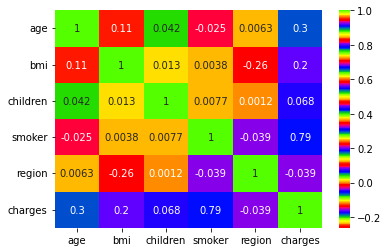

In [27]:
sns.heatmap(df1.corr(),annot=True,cmap = "prism")

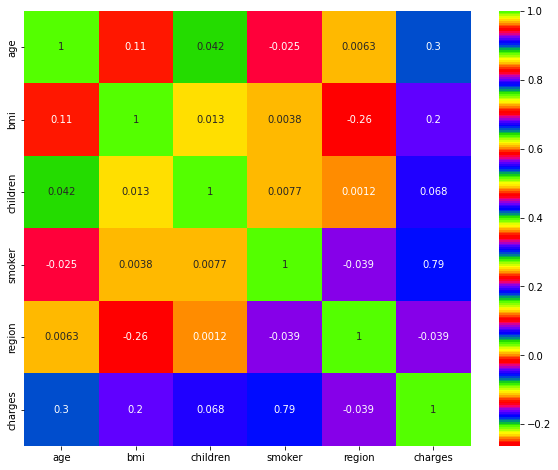

In [26]:
plt.figure(figsize = (10,8))
sns.heatmap(df1.corr(),annot=True,cmap = "prism")
plt.savefig("correlation.png")

#### vif

In [27]:
df1.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

#### 6. Model Training and data spliting

In [28]:
x = df1.drop("charges",axis=1)
y = df1["charges"]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

- `model training

In [30]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

#### Evaluation

#### - On testing data

In [31]:
x_test.shape

(268, 5)

In [32]:
y_pred_test = lr_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_test,y_pred_test)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_test.shape[0]-1))/ (x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 33550382.06162924
Root mean squared error 5792.269163430618
R2 squared value 0.7838927137165881
adjusted r2 score 0.7797685288638512


 - On training side

In [33]:
y_pred_train = lr_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_train,y_pred_train)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_train.shape[0]-1))/ (x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 37300223.22492616
Root mean squared error 6107.39086885113
R2 squared value 0.7415694089475368
adjusted r2 score 0.7403549794783053


#### Regularization - Ridge (L2)

In [36]:
# pip install --upgrade scikit-learn

In [37]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [38]:
x.head(1)

,age,bmi,children,smoker,region
0,19,27.9,0,1,2


In [39]:
y.head(1)

0    16884.924
Name: charges, dtype: float64

In [40]:
y_train.head(1)

560    9193.8385
Name: charges, dtype: float64

In [41]:
rg_model = Ridge(alpha=0.01)
rg_model.fit(x_train,y_train)

Ridge(alpha=0.01)

In [42]:
# pip install -U scikit-learn

In [44]:
# - On Training side
y_pred_train = rg_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_train,y_pred_train)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_train.shape[0]-1))/ (x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

# - On Testing Side
print("Testing side >>>>>>>>>>>>>>")
y_pred_test = rg_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_test,y_pred_test)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_test.shape[0]-1))/ (x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 37300223.52555679
Root mean squared error 6107.3908934631645
R2 squared value 0.7415694068646497
adjusted r2 score 0.7403549773856302
Testing side >>>>>>>>>>>>>>
Mean squared error 33550773.258470785
Root mean squared error 5792.302932208465
R2 squared value 0.7838901939095804
adjusted r2 score 0.7797659609689235


#### 2) lasso

In [45]:
ls_model = Lasso(alpha=0.01)
ls_model.fit(x_train,y_train)

Lasso(alpha=0.01)

In [46]:
# - On Training side
y_pred_train = ls_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_train,y_pred_train)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_train.shape[0]-1))/ (x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

# - On Testing Side
print("Testing side >>>>>>>>>>>>>>")
y_pred_test = ls_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_test,y_pred_test)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_test.shape[0]-1))/ (x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 37300223.225706086
Root mean squared error 6107.390868914981
R2 squared value 0.7415694089421332
adjusted r2 score 0.7403549794728763
Testing side >>>>>>>>>>>>>>
Mean squared error 33550416.856596947
Root mean squared error 5792.272166999488
R2 squared value 0.7838924895925816
adjusted r2 score 0.779768300462669


#### HyperParameter Tuning

In [ ]:
1) GridSearchCV() : search in grid
2) RandomizedSearchCV() : pick any random value

In [47]:
ls_model = Lasso()
para_grid = {"alpha": np.arange(0.01,2,0.01)}
gscv_lass_model = GridSearchCV(estimator=ls_model,param_grid= para_grid,cv = 5)
gscv_lass_model.fit(x_train,y_train)
gscv_lass_model.best_estimator_

Lasso(alpha=1.99)

In [56]:
rg_model = Ridge()
para_grid = {"alpha": np.arange(0.01,2,0.01)}
gscv_rg_model = GridSearchCV(estimator=rg_model,param_grid= para_grid,cv = 5)
gscv_rg_model.fit(x_train,y_train)
gscv_rg_model.best_estimator_

Ridge(alpha=0.66)

#### RandomizedSearchCV

In [57]:
rg_model = Ridge()
para_grid = {"alpha": np.arange(0.01,2,0.01)}
rscv_rg_model = RandomizedSearchCV(rg_model,para_grid,cv=5)
rscv_rg_model.fit(x_train,y_train)
rscv_rg_model.best_estimator_

Ridge(alpha=0.67)

In [58]:
ls_model = Lasso()
para_grid = {"alpha": np.arange(0.01,2,0.01)}
rscv_ls_model = RandomizedSearchCV(ls_model,para_grid,cv=5)
rscv_ls_model.fit(x_train,y_train)
rscv_ls_model.best_estimator_

Lasso(alpha=1.79)

#### Lasso  after paramter tuning

In [60]:
ls_model = rscv_ls_model.best_estimator_
ls_model

Lasso(alpha=1.79)

In [61]:
# - On Training side
y_pred_train = ls_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_train,y_pred_train)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_train.shape[0]-1))/ (x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

# - On Testing Side
print("Testing side >>>>>>>>>>>>>>")
y_pred_test = ls_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_test,y_pred_test)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_test.shape[0]-1))/ (x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 37300248.21430752
Root mean squared error 6107.392914681969
R2 squared value 0.7415692358112915
adjusted r2 score 0.7403548055284499
Testing side >>>>>>>>>>>>>>
Mean squared error 33556633.17674545
Root mean squared error 5792.808746777806
R2 squared value 0.7838524485559253
adjusted r2 score 0.7797274952840918


#### Ridge  after paramter tuning

In [63]:
rg_model = Ridge()
para_grid = {"alpha": np.arange(0.01,2,0.01)}
rscv_rg_model = RandomizedSearchCV(rg_model,para_grid,cv=5)
rscv_rg_model.fit(x_train,y_train)
rscv_rg_model.best_estimator_

Ridge(alpha=0.59)

In [64]:
rg_model = rscv_rg_model.best_estimator_
rg_model

Ridge(alpha=0.59)

In [65]:
# - On Training side

y_pred_train = rg_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_train,y_pred_train)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_train.shape[0]-1))/ (x_train.shape[0]-x_train.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

# - On Testing Side
print("Testing side >>>>>>>>>>>>>>")
y_pred_test = rg_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean squared error",mse) # scale varaient
rmse = np.sqrt(mse)
print("Root mean squared error",rmse)

r2_value_score = r2_score(y_test,y_pred_test)
print("R2 squared value",r2_value_score)

adj_r2_score = 1 - (((1-r2_value_score)* (x_test.shape[0]-1))/ (x_test.shape[0]-x_test.shape[1]-1))
print("adjusted r2 score",adj_r2_score)
# adj_r2 = 1 - ((1-R2)* (N-1))/(N-P-1)

Mean squared error 37301262.78383065
Root mean squared error 6107.475974887716
R2 squared value 0.7415622064753021
adjusted r2 score 0.7403477431598666
Testing side >>>>>>>>>>>>>>
Mean squared error 33574404.56764545
Root mean squared error 5794.3424620612
R2 squared value 0.7837379781140142
adjusted r2 score 0.7796108402917626


#### - Prediction on User input

In [32]:
df1.columns

Index(['age', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [33]:
df1.sample()

,age,bmi,children,smoker,region,charges
1034,61,38.38,0,0,3,12950.0712


In [34]:
def get_charges(age, bmi, children, smoker, region):
    df_val = pd.DataFrame({"age" : [age],
                          "bmi" : [bmi],
                          "children": [children],
                          "smoker": [smoker],
                          "region": [region]})
    y_pred_charges = lr_model.predict(df_val)
    return y_pred_charges

In [35]:
get_charges(48,	36.575,	4,	0,	3)

array([14089.37767692])

In [36]:
# smoker = "no"
# # 'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4
# region = "southwest"

# age = 40
# bmi = 2.3
# children = 3
# smoker = "yes"
# region = "northeast"
# get_charges(age,bmi,children,smoker,region)
# get_charges(40,	36.575,	4,	0,	3)

#### Assumption

In [ ]:
- before building model
1) Linearity :  x & y
2) No Multi-collinearity :  only x variables

- after building model
3) Normality of residual
4) Homoscedasticity

#### 3) Normality of residual

In [ ]:
Normality of residual
  1. kdeplot
  2. Hypothesis testing
    2.1 shapiro test
    2.2 kstest
    2.3 normality test

In [34]:
residual = y_test - y_pred_test

<Axes: xlabel='charges', ylabel='Density'>

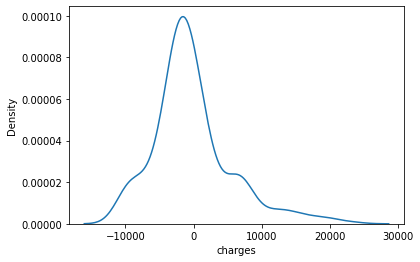

In [57]:
sns.kdeplot(residual)

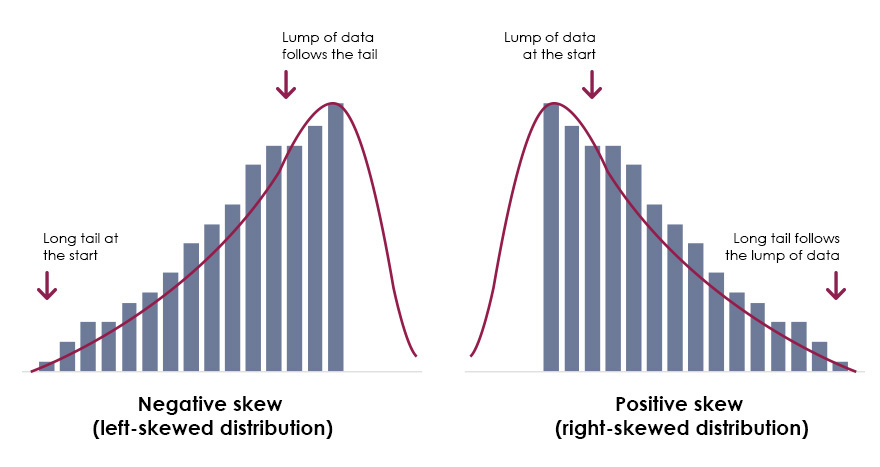

In [ ]:
Null Hypothesis :  Residual is normally distributed
alternate Hypothesis :  Residual is not normally distributed

p_val : 0 to 1
if p_val >= 0.05:
     print(" we are accepting null hypothesis")
else:
    print("we are rejecting null hypothesis, means we are accepting alteranate hypothesis")
  

#### 1. shapiro

In [37]:
_,p_val  = shapiro(residual)
if p_val >= 0.05:
    print("Residual is normally distributed")
else:
    print("Residual is not normally distributed")

Residual is not normally distributed


#### 2. Normal test

In [38]:
_,p_val  = normaltest(residual)
if p_val >= 0.05:
    print("Residual is normally distributed")
else:
    print("Residual is not normally distributed")

Residual is not normally distributed


#### 3. kstest

In [39]:
_,p_val  = kstest(residual,"norm")
if p_val >= 0.05:
    print("Residual is normally distributed")
else:
    print("Residual is not normally distributed")

Residual is not normally distributed


#### 4) Homoscedasticity

In [ ]:
The assumption of equal variance
it means residual should be in specific range for all independent variables

<Axes: xlabel='charges', ylabel='charges'>

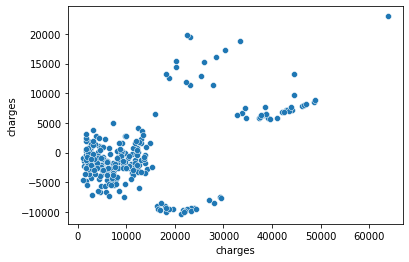

In [47]:
sns.scatterplot(x= y_test, y= residual) # residual = y_test - y_

#### Model - save

In [37]:
import pickle

In [38]:
with open("linear_model.pkl","wb") as file:
    pickle.dump(lr_model,file)

In [40]:
x.columns

Index(['age', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [39]:
# df1["region"].replace({'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4},inplace=True)
# # 'smoker', 'region'
# df1["smoker"].replace({"yes":1,"no":0},inplace=True)

In [41]:
label_json = {"region": {'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4},
             "smoker" : {"yes":1,"no":0},
             "columns" : list(x.columns)}
label_json

{'region': {'southeast': 1, 'southwest': 2, 'northwest': 3, 'northeast': 4},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['age', 'bmi', 'children', 'smoker', 'region']}

In [42]:
import json

In [43]:
with open("label_encode.json","w") as file:
    json.dump(label_json,file)